In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

### EDA

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(columns=['customer_id'],inplace=True)

In [5]:
df.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
df.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.nunique()

credit_score         460
country                3
gender                 2
age                   70
tenure                11
balance             6382
products_number        4
credit_card            2
active_member          2
estimated_salary    9999
churn                  2
dtype: int64

<Axes: xlabel='gender', ylabel='count'>

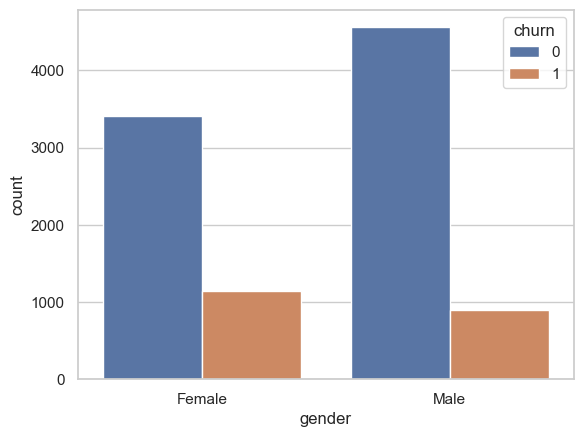

In [9]:
sns.set(style="whitegrid")
sns.countplot(data=df,x='gender',hue='churn')

Text(0.5, 1.0, 'Count of churn for each balance interval')

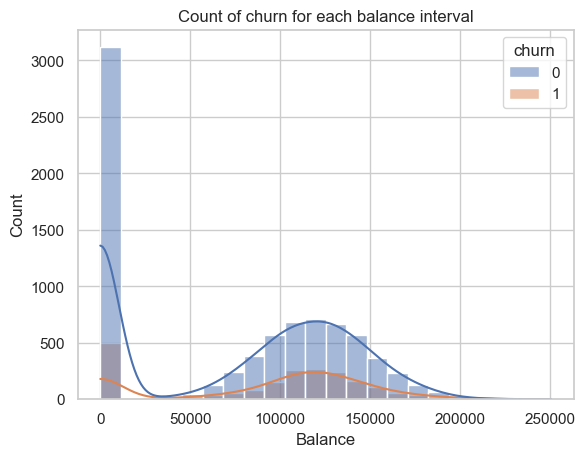

In [10]:
sns.set(style="whitegrid")
sns.histplot(data=df.value_counts(),x='balance',hue='churn',kde=True)
plt.xlabel("Balance")
plt.ylabel("Count")
plt.title("Count of churn for each balance interval")

Text(0.5, 1.0, 'Count churn for each age interval ')

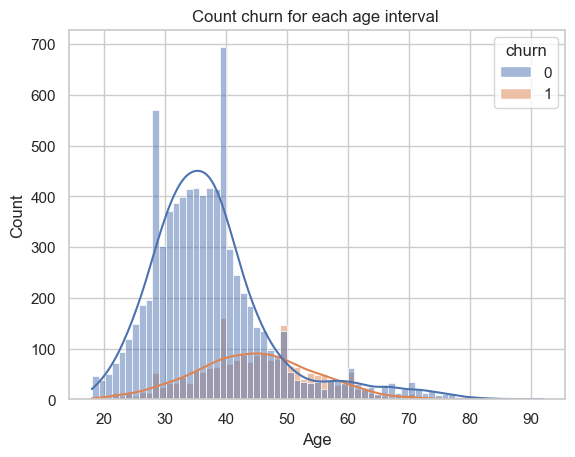

In [11]:
sns.set(style="whitegrid")
sns.histplot(data=df.value_counts(),x='age',hue='churn',kde=True)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Count churn for each age interval ")

Text(0.5, 1.0, 'Active member count')

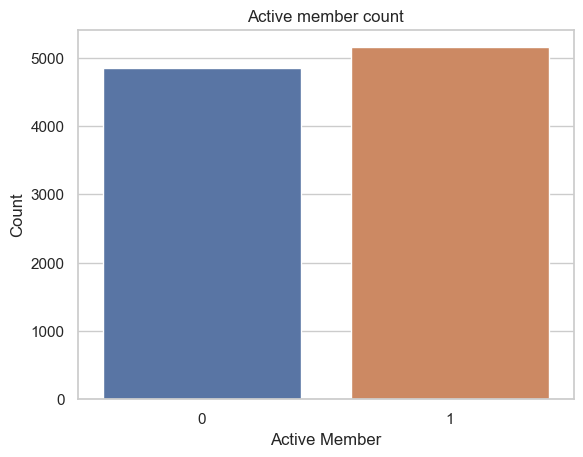

In [12]:
sns.set(style="whitegrid")
sns.countplot(data=df,x='active_member')
plt.xlabel("Active Member")
plt.ylabel("Count")
plt.title("Active member count")

Text(0.5, 1.0, 'Churn count for active members , and innactive ones')

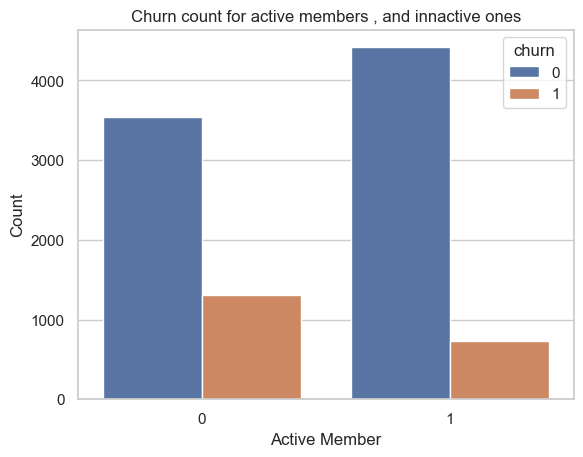

In [13]:
sns.set(style="whitegrid")
sns.countplot(data=df,x='active_member',hue='churn')
plt.xlabel("Active Member")
plt.ylabel("Count")
plt.title("Churn count for active members , and innactive ones")

Text(0.5, 1.0, 'Churn count')

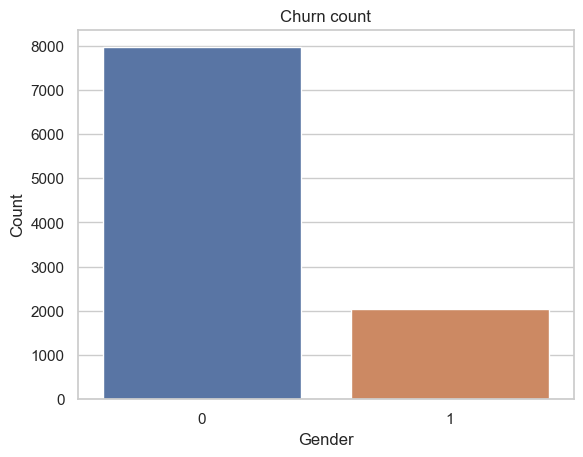

In [14]:
sns.set(style="whitegrid")
sns.countplot(data=df,x='churn')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn count")

Text(0.5, 1.0, 'Churn count for each gender')

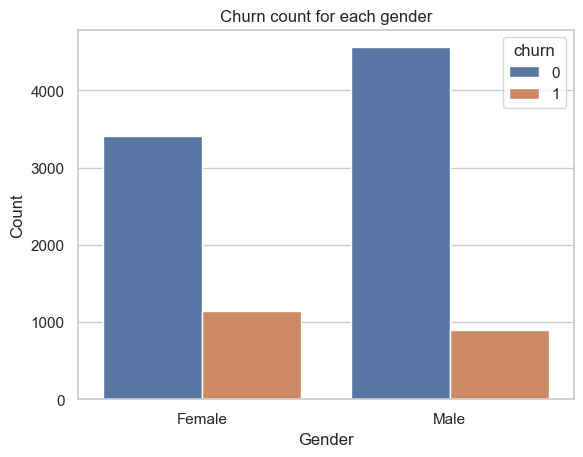

In [15]:
sns.set(style="whitegrid")
sns.countplot(x="gender", hue="churn", data=df)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Churn count for each gender")

Text(0.5, 1.0, "Churn count for people that have credit hard and those haven't")

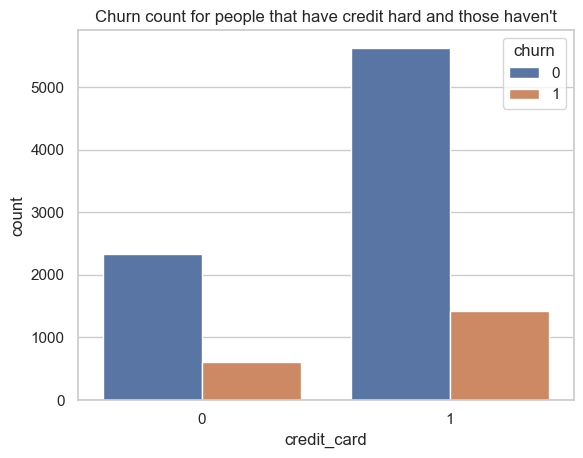

In [16]:
sns.set(style="whitegrid")
sns.countplot(x='credit_card',data=df,hue='churn')
plt.title("Churn count for people that have credit hard and those haven't")

Text(0.5, 1.0, 'Churn Rate vs. Estimated Salary')

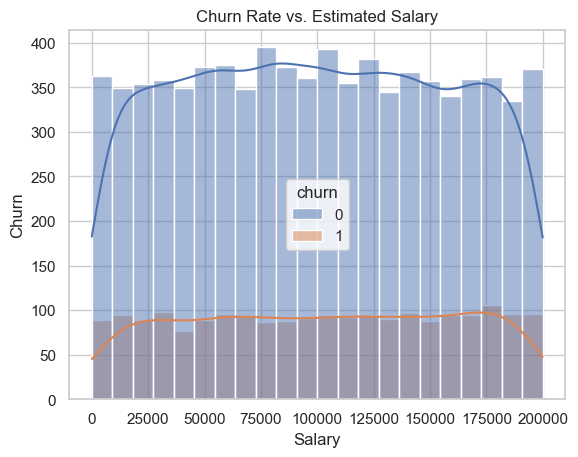

In [17]:
sns.set(style="whitegrid")
sns.histplot(data=df,x='estimated_salary',hue='churn',kde=True)
plt.xlabel("Salary")
plt.ylabel("Churn")
plt.title("Churn Rate vs. Estimated Salary"

)

Text(0.5, 1.0, 'Churn count for each tenure interval')

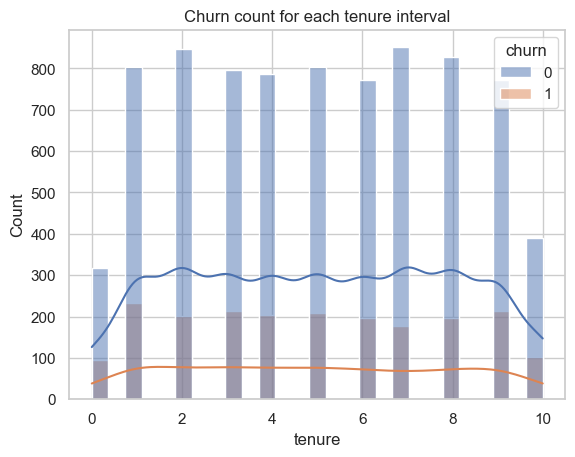

In [18]:
sns.set(style='whitegrid')
sns.histplot(data=df,x='tenure',hue='churn',kde=True)
plt.title('Churn count for each tenure interval')


Text(0.5, 1.0, 'Churn count for each country')

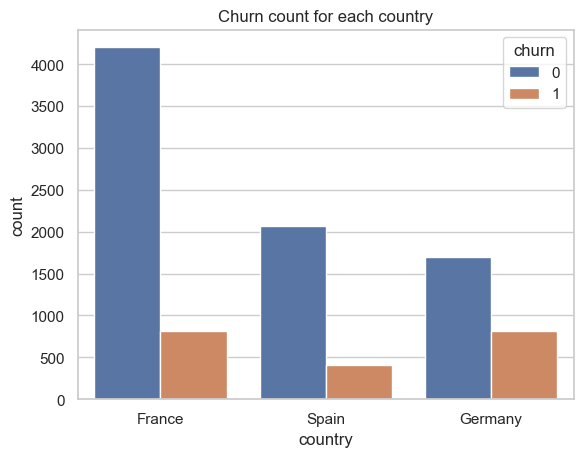

In [19]:
sns.countplot(data=df,x='country',hue='churn')
plt.title('Churn count for each country')

C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\2269385913.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

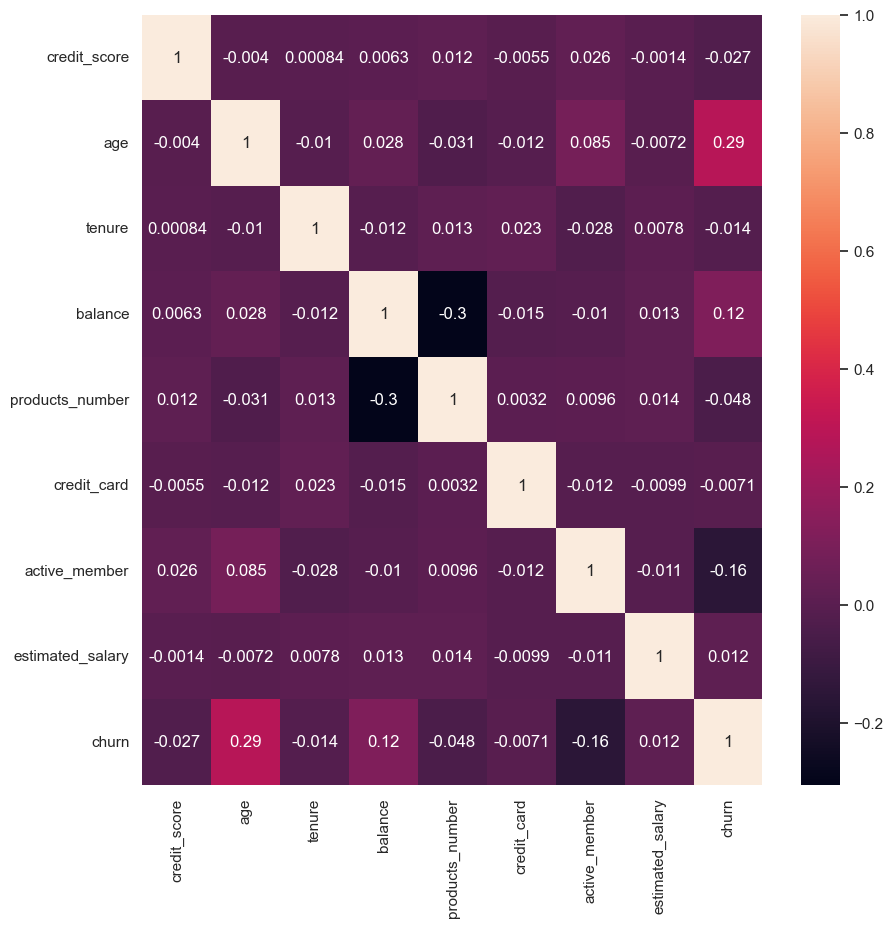

In [20]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

## Our EDA Summary:
##### **.** Our target variable is highly unbalanced , we'll need to use an oversampling technique to get an even more balanced dataset
##### **.** People between 50-60 years old have a higher chance of closing their bank account
##### **.** Females have a higher chance of closing their accounts than men , but overall both genders are more likely to not move out of the bank
##### **.** People from France are very likely to stay with the bank , on the other hand , people from germany have a higher probability of quitting
##### **.** Active members are more likely to stay with the bank

# Data Preprocessing

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder


In [22]:
df_backup = df.copy()
categorical = ['gender','country']
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['country'] = label_encoder.fit_transform(df['country'])

In [23]:
scaler = MinMaxScaler()
df[['estimated_salary','balance','credit_score']] = scaler.fit_transform(df[['estimated_salary','balance','credit_score']])

In [24]:
x = df.drop(columns=['churn'])
y= df['churn']

In [25]:
smote = SMOTE(sampling_strategy='auto') 
x_resampled, y_resampled = smote.fit_resample(x, y)

In [26]:
x_train , x_test , y_train , y_test = train_test_split(x_resampled,y_resampled,test_size=0.33,random_state=45)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier


Text(0, 0.5, 'Error Rate')

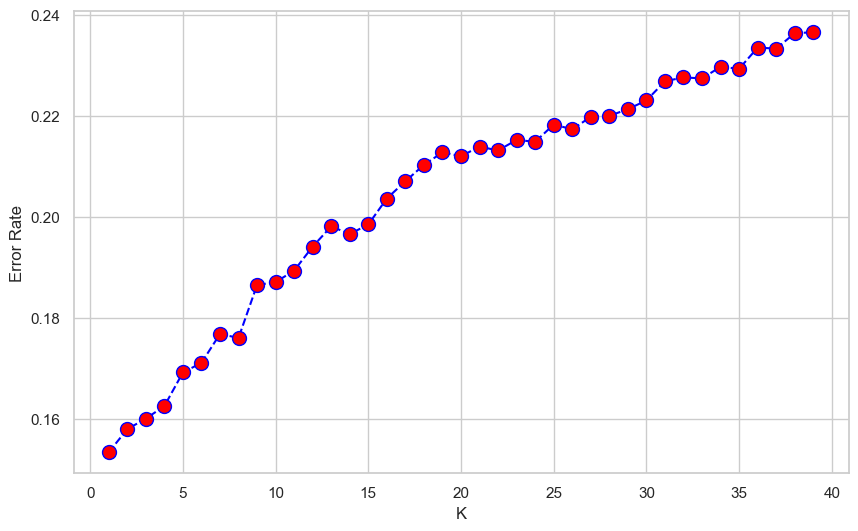

In [31]:
error=[]
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(x_train,y_train)
 pred_i = knn.predict(x_test)
 error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error,color='blue', linestyle='dashed', marker='o',
markerfacecolor='red', markersize=10)
plt.xlabel('K')
plt.ylabel('Error Rate')

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [33]:
models = {
    'LR': LogisticRegression(),
    'DTC':DecisionTreeClassifier(),
    'SVM':SVC(),
    'Xgboost':XGBClassifier(),
    'lightgb':LGBMClassifier(),
    'KNN':KNeighborsClassifier(n_neighbors=1),
    'RFC':RandomForestClassifier()
}
metrics_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model_name, model in models.items():
    model.fit(x_train , y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    metrics_df = metrics_df.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }, ignore_index=True)

C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\1889359077.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\1889359077.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({

[LightGBM] [Info] Number of positive: 5315, number of negative: 5355
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000863 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 10670, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498126 -> initscore=-0.007498
[LightGBM] [Info] Start training from score -0.007498


C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\1889359077.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\1889359077.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({
C:\Users\Asus\AppData\Local\Temp\ipykernel_18788\1889359077.py:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  metrics_df = metrics_df.append({


In [34]:
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LR,0.728501,0.728528,0.728501,0.728505
1,DTC,0.804033,0.804283,0.804033,0.803962
2,SVM,0.726408,0.730433,0.726408,0.725420
3,Xgboost,0.843227,0.843353,0.843227,0.843225
4,lightgb,0.839612,0.839893,0.839612,0.839599
5,KNN,0.846651,0.851349,0.846651,0.846054
6,RFC,0.875190,0.875206,0.875190,0.875192


In [48]:
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
predicted_train = rfc.predict(x_train)
predicted_test = rfc.predict(x_test)

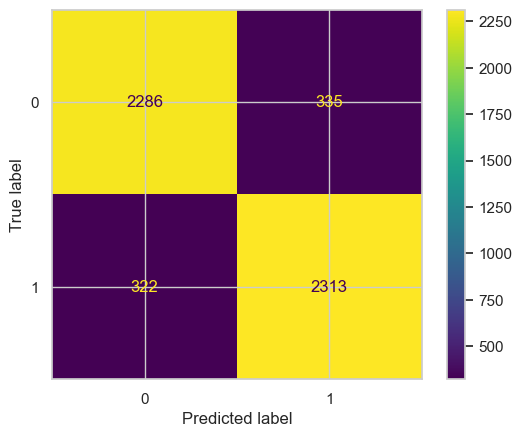

In [49]:
cm = confusion_matrix(predicted_test,y_test)
cfmt=ConfusionMatrixDisplay(confusion_matrix=cm)
cfmt.plot()
plt.show()

In [50]:
print(classification_report(y_test, predicted_test))


              precision    recall  f1-score   support

           0       0.87      0.88      0.87      2608
           1       0.88      0.87      0.88      2648

    accuracy                           0.88      5256
   macro avg       0.87      0.88      0.87      5256
weighted avg       0.88      0.88      0.88      5256

